In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split

import functions.ml_functions as ml
import functions.misc_functions as misc
import functions.metrics as mtr

datasets with a 1 are buckingham street  
datasets with a 2 are kilmainham gaol

In [2]:
ten1 = pd.read_csv('data/ten_min.csv')
ten2 = pd.read_csv('data/ten_min_2.csv')
thirty1 = pd.read_csv('data/thirty_min.csv')
thirty2 = pd.read_csv('data/thirty_min_2.csv')
sixty1 = pd.read_csv('data/sixty_min.csv')
sixty2 = pd.read_csv('data/sixty_min_2.csv')

In [3]:
df1 = ten1
df2 = ten2
df3 = thirty1
df4 = thirty2
df5 = sixty1
df6 = sixty2

In [4]:
df5

,Unnamed: 0,AVAILABLE BIKES,t,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,B60,B65,B70,B75,B80,DB1,DB2,DDB1DB2
0,16,20,0.055556,0,1,0,0,0,0,0,23,23,23,23,23,0,0,0
1,17,20,0.059028,0,1,0,0,0,0,0,22,23,23,23,23,1,0,-1
2,18,19,0.062500,0,1,0,0,0,0,0,22,22,23,23,23,0,1,1
3,19,18,0.065972,0,1,0,0,0,0,0,22,22,22,23,23,0,0,0
4,20,17,0.069444,0,1,0,0,0,0,0,22,22,22,22,23,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17970,17986,14,0.982639,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17971,17987,14,0.986111,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17972,17988,14,0.989583,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0
17973,17989,14,0.993056,0,1,0,0,0,0,0,14,14,14,14,14,0,0,0


In [5]:
def train_ridge(input_features, target_feature, alpha_value):
    """
    Fits a ridge regressor to a set of data
    Parameters
    ----------
    input_features : numpy.ndarray
        features
    target_feature : numpy.ndarray
        target features
    alpha_value : float
        used to determine strength of regularisation
    Returns
    ----------
    model : linear_model.Ridge
    """
    ### train a Ridge regression model.
    ### alpha seems to be approximately 1/c
    ### https://stats.stackexchange.com/questions/216095/how-does-alpha-relate-to-c-in-scikit-learns-sgdclassifier
    model = Ridge(alpha=alpha_value, max_iter=1000000000)
    model.fit(input_features, target_feature)
    # print('coeffs =',model.coef_)
    return model

In [6]:
def stack_features(df:pd.DataFrame):
    X1 = df.iloc[:, 2]
    X2 = df.iloc[:, 3]
    X3 = df.iloc[:, 4]
    X4 = df.iloc[:, 5]
    X5 = df.iloc[:, 6]
    X6 = df.iloc[:, 7]
    X7 = df.iloc[:,8]
    X8 = df.iloc[:, 9]
    X9 = df.iloc[:, 10]
    X10 = df.iloc[:, 11]
    X11 = df.iloc[:, 12]
    X12 = df.iloc[:,13]
    X13 = df.iloc[:, 14]
    X14 = df.iloc[:, 15]
    X15 = df.iloc[:,16]
    X16 = df.iloc[:, 17]
    X = np.column_stack((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16))

    Y = df.iloc[:, 1]
    return X, Y

In [7]:
X1, Y1 =stack_features(df1) 
X2, Y2 = stack_features(df2)
X3, Y3 =stack_features(df3) 
X4, Y4 = stack_features(df4)
X5, Y5 =stack_features(df5) 
X6, Y6 = stack_features(df6)


In [8]:
X3

array([[ 0.03472222,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03819444,  0.        ,  1.        , ...,  1.        ,
         0.        , -1.        ],
       [ 0.04166667,  0.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.98958333,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99305556,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99653935,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [9]:
X4

array([[ 0.03472222,  0.        ,  1.        , ...,  0.        ,
         2.        ,  2.        ],
       [ 0.03819444,  0.        ,  1.        , ...,  1.        ,
         0.        , -1.        ],
       [ 0.04166667,  0.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [ 0.98958333,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99305556,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99653935,  0.        ,  1.        , ...,  1.        ,
         0.        , -1.        ]])

In [10]:
def train_Kfold_ridge(X_features, y_features, c_value):
    """
    Uses K-fold cross validation 
    Parameters
    ----------
    X_features : array 
        features
    y_features : array
        target features
    c_value : float
        parameter for training
    Returns
    ----------
    mean error : float
    standard error : float
    """
    kf = KFold(n_splits=5)
    model = Ridge(alpha=1/(2*c_value))
    errs = []
    # model = linear_model.Lasso(alpha=1/(2*c_value), max_iter=1000000000).fit()
    for train, test in kf.split(X_features):
        model.fit(X_features[train],y_features[train])
        ypred = model.predict(X_features[test])
        from sklearn.metrics import mean_squared_error
        # print("square error %f"%(mean_squared_error(y_features[test],ypred)))
        errs.append(mean_squared_error(y_features[test],ypred))
    # print(np.mean(errs))
    return np.mean(errs), np.std(errs)

In [11]:
def Kfold_for_C_ridge(X_features, y_features, C_range, title:str):
    """
    Uses K-fold cross validation with varied values of C
    Parameters
    ----------
    X_features : array 
        features
    y_features : array
        target features
    C_range : array of float
        parameters for training
    Returns
    ----------
    nothing
    """
    error_array = np.zeros(len(C_range))
    std_dev_array = np.zeros(len(C_range))
    for i in range(len(C_range)):
        # print("\n\n C = %f"%(C_range[i]))
        error_array[i], std_dev_array[i] = train_Kfold_ridge(X_features, y_features, C_range[i])


    # print(error_array)

    plt.figure(title)
    plt.errorbar(C_range, error_array, yerr=std_dev_array)
    plt.xlabel('C value')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    # x = np.arange(len(error_array))
    # plt.bar(x, C_range, error_array)

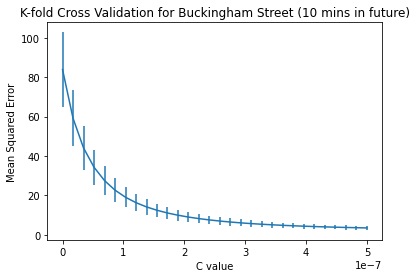

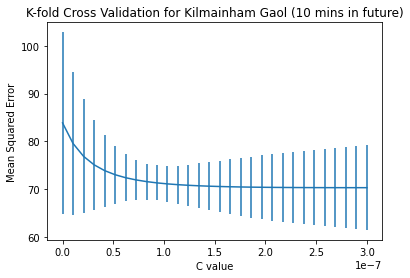

In [12]:
C_range = np.linspace(0.00000000001, 5e-7,num=30)
Kfold_for_C_ridge(X1,Y1,C_range, 'K-fold Cross Validation for Buckingham Street (10 mins in future)')
C_range = np.linspace(0.00000000001, 3e-7,num=30)
Kfold_for_C_ridge(X2,Y2,C_range, 'K-fold Cross Validation for Kilmainham Gaol (10 mins in future)')

minimised by (around) 4e-7 for both

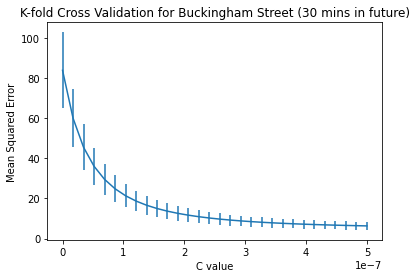

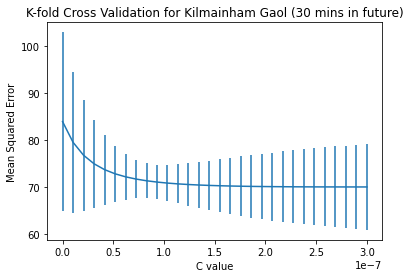

In [13]:
C_range = np.linspace(0.00000000001, 5e-7,num=30)
Kfold_for_C_ridge(X3,Y3,C_range, 'K-fold Cross Validation for Buckingham Street (30 mins in future)')
C_range = np.linspace(0.00000000001, 3e-7,num=30)
Kfold_for_C_ridge(X4,Y4,C_range, 'K-fold Cross Validation for Kilmainham Gaol (30 mins in future)')

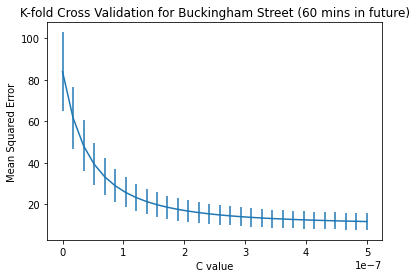

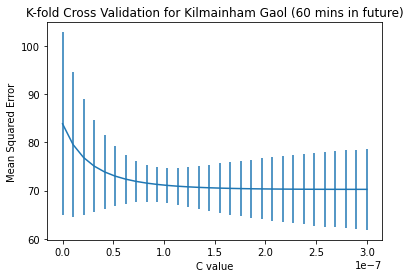

In [14]:
C_range = np.linspace(0.00000000001, 5e-7,num=30)
Kfold_for_C_ridge(X5,Y5,C_range, 'K-fold Cross Validation for Buckingham Street (60 mins in future)')
C_range = np.linspace(0.00000000001, 3e-7,num=30)
Kfold_for_C_ridge(X6,Y6,C_range, 'K-fold Cross Validation for Kilmainham Gaol (60 mins in future)')

It seems like they all have more or less the exact same curve  - this was a bug  
when looking closer the further into the future values will undoubtedly have worse performance

I now feel that I can use the same model for all 6 datasets,  
For simplicity this translates to an alpha of 1.25e6

In [15]:
# model = train_ridge(X1, Y1, 1.25e-8)
# ml.generate_predictions(model, X1)

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.3, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size=0.3, random_state=42)

In [24]:
model1 = Ridge(alpha=1.25e6).fit(X1_train,y1_train)
predictions1 = ml.generate_predictions(model1, X1_test)
mse1 = mtr.calculate_mse(predictions1,y1_test)
train_predictions1 = ml.generate_predictions(model1, X1_train)
train_mse1 = mtr.calculate_mse(train_predictions1,y1_train)

model2 = Ridge(alpha=5e6).fit(X2_train,y2_train)
predictions2 = ml.generate_predictions(model2, X2_test)
mse2 = mtr.calculate_mse(predictions2,y2_test)
train_predictions2 = ml.generate_predictions(model2, X2_train)
train_mse2 = mtr.calculate_mse(train_predictions2,y2_train)

model3 = Ridge(alpha=1.25e6).fit(X3_train,y3_train)
predictions3 = ml.generate_predictions(model3, X3_test)
mse3 = mtr.calculate_mse(predictions3,y3_test)
train_predictions3 = ml.generate_predictions(model3, X3_train)
train_mse3 = mtr.calculate_mse(train_predictions3,y3_train)

model4 = Ridge(alpha=5e6).fit(X4_train,y4_train)
predictions4 = ml.generate_predictions(model4, X4_test)
mse4 = mtr.calculate_mse(predictions4,y4_test)
train_predictions4 = ml.generate_predictions(model4, X4_train)
train_mse4 = mtr.calculate_mse(train_predictions4,y4_train)

model5 = Ridge(alpha=1.25e6).fit(X5_train,y5_train)
predictions5 = ml.generate_predictions(model5, X5_test)
mse5 = mtr.calculate_mse(predictions5,y5_test)
train_predictions5 = ml.generate_predictions(model5, X5_train)
train_mse5 = mtr.calculate_mse(train_predictions5,y5_train)

model6 = Ridge(alpha=5e6).fit(X6_train,y6_train)
predictions6 = ml.generate_predictions(model6, X6_test)
mse6 = mtr.calculate_mse(predictions6,y6_test)
train_predictions6 = ml.generate_predictions(model6, X6_train)
train_mse6 = mtr.calculate_mse(train_predictions6,y6_train)

In [18]:
train_mse1

4.683506004534059

In [19]:
print(model1.coef_)
print(model2.coef_)

[ 3.03327964e-03 -6.06014726e-04 -1.95519132e-04  3.06327222e-05
  8.99752781e-05 -3.50883008e-04  6.22671177e-04  4.09137688e-04
  1.65780313e-01  1.62009657e-01  1.58646526e-01  1.55785244e-01
  1.53308596e-01 -3.77065649e-03 -3.36313096e-03  4.07525539e-04]
[ 2.17317322e-03 -4.39134823e-04 -3.99511686e-04 -8.47496335e-05
 -7.50016944e-05 -3.78929620e-04  6.96183123e-04  6.81144334e-04
  4.77709335e-02  4.82122840e-02  4.86646147e-02  4.92881557e-02
  4.99537050e-02  4.41350535e-04  4.52330716e-04  1.09801808e-05]


In [26]:
print(f"mse 1: {mse1}, training mse = {train_mse1}")
print(f"mse 2: {mse2}, training mse = {train_mse2}")
print(f"mse 3: {mse3}, training mse = {train_mse3}")
print(f"mse 4: {mse4}, training mse = {train_mse4}")
print(f"mse 5: {mse5}, training mse = {train_mse5}")
print(f"mse 6: {mse6}, training mse = {train_mse6}")


mse 1: 4.823101258632256, training mse = 4.683506004534059
mse 2: 64.56017083949443, training mse = 64.55803971281681
mse 3: 7.805132594506923, training mse = 7.4217296101181764
mse 4: 64.74637867329281, training mse = 63.99229717596225
mse 5: 13.425894211354745, training mse = 12.493075005106212
mse 6: 64.14503951790617, training mse = 64.78606184182172


In [27]:
predictions1

array([11.11344413, 15.38202697, 11.8549346 , ..., 14.12598169,
       25.90553112, 14.60994872])

In [28]:
y1_test

4767     11
8373     15
313       9
6209     26
11827    21
         ..
9634     17
10250    14
3312     14
479      23
1596     14
Name: AVAILABLE BIKES, Length: 5396, dtype: int64